In [86]:
import pandas as pd # Таблицы
import seaborn as sns # Графики
import numpy as np # Матрицы
import matplotlib.pyplot as plt # Математические операции
import scipy.stats as stats # Статистика
import statsmodels.api as sm # Статистические модели

# Описание переменных

__respondent_ID:__ ID респондента

__duration:__ Время, потраченное на опрос, в минутах 

__sex:__ Пол (1=М, 2=Ж)

__age:__ Возраст (18-69)

__marital_status:__ Cемейное положение (1=одинокий, 2=женат/замужем, 3= в разводе,4=вдовец/вдова, 5=совместное проживание без зарегистрированного брака)

__number_children:__ Число детей (1 = нет, 2=1, 3=2, 4=3, 5=4, 6=5 и более)

__q_parent_same:__ Родители респондента родились в этой же стране (1=Yes, 2=No)

__employment:__ Занятость (1=Полный рабочий день, 2=Неполный рабочий день, 3=Самозанятый, 4=Безработный, 5=Обучающийся, 6=Не работает и не ищет работу, 7=На пенсии)

__university_degree:__ Закончил(а) университет (0=Нет, 1=Да)

__household_income:__ Общий доход домашнего хозяйства (1=$0-$9999, 2=$10000-$14999,3=$15000- $19999, 4=$20000-$29999, 5=$30000-$39999, 6=$40000-$49999, 
7=$50000-$69999, 8=$70000-$89999, 9=$90000-$109999, 10=$110000-$149999, 11=$150000-
$199999, 12=$200000+)

__sector_dummy:__ Занят(а) в секторе, где работает много иммигрантов (0=Нет, 1=Да)

__party_voted:__ На последних выборах голосовал за политическую партию (0=не укладывается в классификацию (напр., популистиские), 1=правая, 2=правоцентристская, 
3=центристская, 4=левоцентристская, 5=левая, 6=другое)

__country:__ Страна проживания (DE=Германия, FR=Франция, IT=Италия, SE=Швеция,UK=Великобритания, US=США)

__Официальные данные__

__share_foreign_lc:__ Доля иммигрантов в месте, где человек проживает

__Взгляды респондента на политику, связанную с неравенством и иммиграцией__

__q_inequality_problem:__ Считает, что неравенство по доходам – это проблема (1=совсем не проблема, 2=небольшая проблема, 3=проблема, 4=серьезная проблема, 
5=очень серьезная проблема)

__q_imm_problem:__ Является ли проблемой численность легальных иммигрантов? (13=совсем не проблема, 14=небольшая проблема, 15=проблема, 16=серьезная проблема, 17=очень серьезная проблема)

__q_imm_benefits:__ Когда иммигранты должны иметь право на помощь со стороны государства? (1=немедленно, 2=через год после переезда, 4=через три года после переезда, 6=через пять лет после переезда, 7=после получения гражданства, 8=никогда) 

__q_imm_citizenship:__ Через сколько лет после переезда иммигранты должны получать гражданство? (1=через 2 года, 2=через 5 лет, 3=через 10 лет, 4=через 20 лет, 
5=никогда)

__q_imm_american:__ Через сколько лет после иммиграции иммигранта можно считать американцем/немцем/шведом и т.д. (1=через 5 лет, 2=через 10 лет, 3=зависит от того, 
из какой страны он приехал, 4=когда получит гражданство, 5=никогда, только его дети могут считаться, 6=ни он, ни его дети никогда не станут, 7=немедленно после переезда)

# Импорт и очистка от лишних переменных

In [87]:
all_data = pd.read_excel('Immigration.xls')

In [88]:
# Удаление ненужных переменных
data = all_data.drop(['perc_share_foreign', 'perc_share_ch', 'perc_share_mu', 
       'perc_unemp_nat', 'perc_unemp_imm', 'perc_higheduc_nat',
       'perc_higheduc_imm', 'perc_loweduc_nat', 'perc_loweduc_imm',
       'perc_poverty_nat', 'perc_poverty_imm', 'transfers_imm', 
       'tax_top1', 'tax_bottom50', 'q_govt_imm', 'perc_share_NA',
       'perc_share_LA', 'perc_share_WE', 'perc_share_EE', 'perc_share_NAF',
       'perc_share_SA', 'perc_share_ME', 'perc_share_A', 'perc_share_O',
       'share_Europe_lc', 'share_NorthAmerica_lc',
       'share_LatinAmerica_lc', 'share_Asia_lc', 'share_Africa_lc',
       'college_imm_lc', 'loweduc_imm_lc', 'college_nat_lc', 'loweduc_nat_lc',
       'unemp_imm_lc', 'unemp_nat_lc', 'poor_lc', 'effort_poor', 'effort_rich', 
       'total_donation', 'respondent_ID'
       ], axis=1)

In [89]:
# Размерность данных (количество строк, количество колонок)
data.shape

(22004, 18)

In [90]:
# Для удобства изменю порядок столбцов
data = data.reindex(columns=['duration', 'sex', 'age',
        'marital_status', 'number_children', 'q_parent_same', 'employment', 
        'university_degree', 'household_income', 'sector_dummy',
        'party_voted', 'country', 'share_foreign_lc',
        'q_imm_problem', 'q_imm_benefits', 'q_imm_citizenship',
        'q_imm_american'])

In [91]:
# Информация о признаках
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22004 entries, 0 to 22003
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration           22004 non-null  float64
 1   sex                22004 non-null  int64  
 2   age                22004 non-null  int64  
 3   marital_status     21982 non-null  float64
 4   number_children    22000 non-null  float64
 5   q_parent_same      21994 non-null  float64
 6   employment         21988 non-null  float64
 7   university_degree  22001 non-null  float64
 8   household_income   21990 non-null  float64
 9   sector_dummy       21931 non-null  float64
 10  party_voted        21797 non-null  float64
 11  country            22004 non-null  object 
 12  share_foreign_lc   21922 non-null  float64
 13  q_imm_problem      21950 non-null  float64
 14  q_imm_benefits     21980 non-null  float64
 15  q_imm_citizenship  21976 non-null  float64
 16  q_imm_american     219

# Диагностика и обработка выбросов и повторов

In [92]:
# Поиск выбросов
data.isna().sum() 

duration               0
sex                    0
age                    0
marital_status        22
number_children        4
q_parent_same         10
employment            16
university_degree      3
household_income      14
sector_dummy          73
party_voted          207
country                0
share_foreign_lc      82
q_imm_problem         54
q_imm_benefits        24
q_imm_citizenship     28
q_imm_american        36
dtype: int64

In [93]:
print('Всего', data.isna().sum().sum(), 'выброса')

Всего 573 выброса


In [94]:
# Удаление выбросов
data = data.dropna()

In [95]:
data.duplicated().sum()

0

Дубликаты в данных отсутствуют

# Первичный анализ и описательные статистики

In [96]:
# Определю списки с названиями категориальных и числовых признаков
num_var = ['age', 'duration', 'share_foreign_lc']
cat_var = data.columns.drop(['age', 'duration', 'share_foreign_lc']) # Большинство числовых признаков заданы в категориальном виде

In [97]:
# Описание числовых признаков
data[num_var].describe()

,age,duration,share_foreign_lc
count,21500.000000,21500.000000,21500.000000
mean,43.005767,66.356697,12.487682
std,14.225195,458.156250,7.377002
min,18.000000,2.116667,0.527241
25%,30.000000,15.500000,6.852878
50%,43.000000,21.133333,10.930332
75%,55.000000,29.633333,17.478685
max,69.000000,15622.766602,44.338654


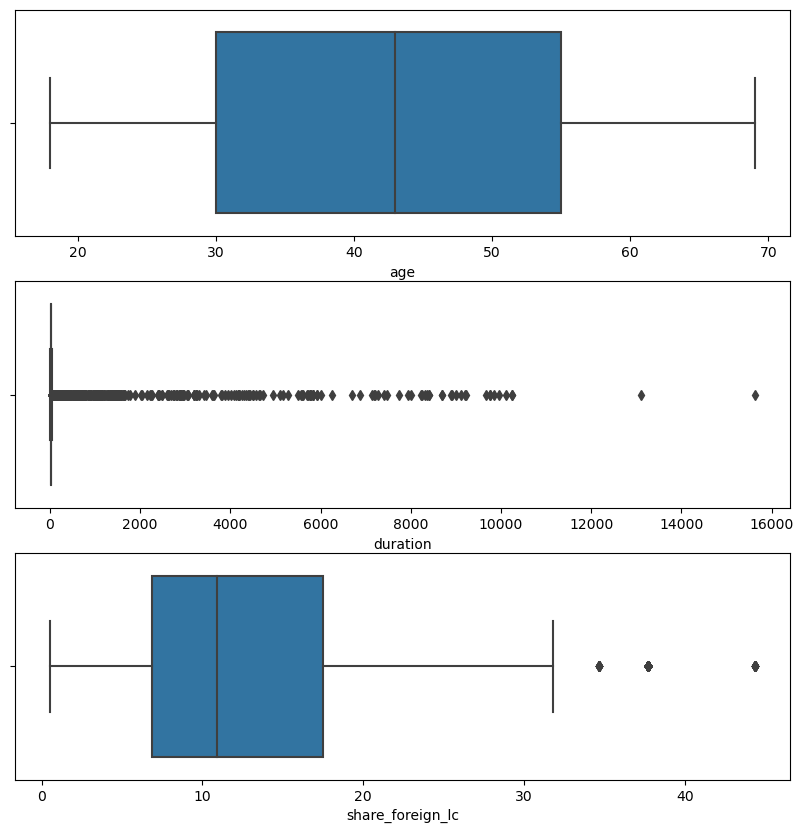

In [98]:
# Построю box-plot для каждой числовой переменной
fig, ax = plt.subplots(3, figsize=(10, 10))

for i, var in enumerate(num_var):
    sns.boxplot(x=data[var], ax=ax[i])

По графику видим, что для переменной age выбросов нет, когда как в остальных числовых переменных - есть

In [99]:
# Чищу выбросы методом 3 IQR
for i in num_var:
    Q1 = np.quantile(data[i], 0.25) # вычислю 1 и 3 квартили
    Q3 = np.quantile(data[i], 0.75)

    IQR = Q3 - Q1 # вычислю межквартильный размах

    lower_bound = Q1 - 3 * IQR # определю нижнюю и верхнюю границу выбросов
    upper_bound = Q3 + 3 * IQR

    data = data[data[i] <= upper_bound] # почищу признак от выбросов и перезапишу данные

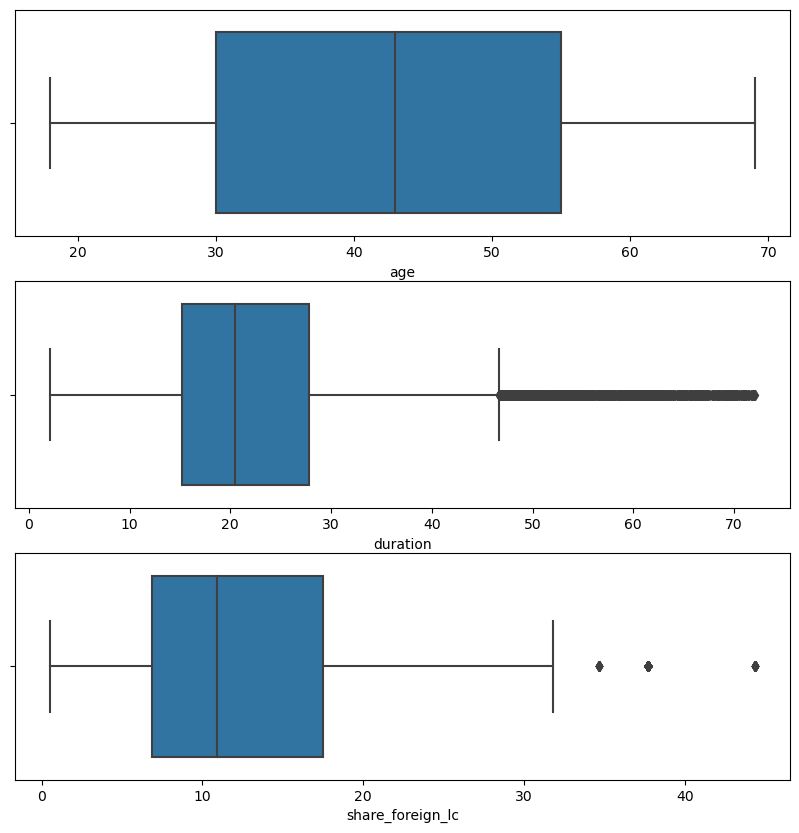

In [100]:
# Построю box-plot для каждой числовой переменной без выбросов
fig, ax = plt.subplots(3, figsize=(10, 10))

for i, var in enumerate(num_var):
    sns.boxplot(x=data[var], ax=ax[i], )

In [101]:
# Выведу моду и число уникальных значений для категориальных признаков
pd.concat( # соединение таблиц
    [data[cat_var].mode().iloc[0], data[cat_var].nunique()], 
    axis=1, keys=['Мода', 'Число уникальных значений']
)

,Мода,Число уникальных значений
sex,2,2
marital_status,2.0,5
number_children,1.0,6
q_parent_same,1.0,2
employment,1.0,7
university_degree,0.0,2
household_income,5.0,12
sector_dummy,1.0,2
party_voted,4.0,7
country,UK,6


In [102]:
# Кодирую переменную country
from sklearn.preprocessing import LabelEncoder

data['country'] = LabelEncoder().fit_transform(data['country'])

# Корреляционный анализ

In [103]:
# Использую ранговую корреляцию, так как присутствуют порядковые признаки
corrs = data.drop('country', axis=1).corr(method='spearman')
# Удалил страну, так как она не является порядковым признаком.
# Остальные же признаки упорядоченны по какому-то принципу
corrs

,duration,sex,age,marital_status,number_children,q_parent_same,employment,university_degree,household_income,sector_dummy,party_voted,share_foreign_lc,q_imm_problem,q_imm_benefits,q_imm_citizenship,q_imm_american
duration,1.000000,0.054616,0.218506,0.090860,0.084849,0.030667,0.163694,-0.083985,-0.047906,-0.051741,-0.003348,-0.003207,0.091402,0.003527,-0.041730,0.054009
sex,0.054616,1.000000,-0.072584,0.033395,0.025378,0.012479,0.141445,-0.014713,-0.080285,-0.069516,0.043955,-0.016628,0.010299,0.024443,-0.033776,0.048927
age,0.218506,-0.072584,1.000000,0.429013,0.399632,-0.055791,0.249672,-0.059816,0.063644,-0.044179,-0.058222,-0.026241,-0.060634,0.050683,0.026401,0.031227
marital_status,0.090860,0.033395,0.429013,1.000000,0.482989,-0.027945,0.013709,0.009033,0.161236,-0.011849,-0.068261,-0.001018,-0.068506,0.031117,0.033411,0.021565
number_children,0.084849,0.025378,0.399632,0.482989,1.000000,-0.040010,0.020659,-0.020865,0.153136,0.030743,-0.058709,-0.054765,-0.074369,0.027973,0.042080,0.004026
q_parent_same,0.030667,0.012479,-0.055791,-0.027945,-0.040010,1.000000,0.015896,0.023543,0.006722,-0.037640,0.027040,0.145348,0.062841,-0.044442,-0.043985,-0.013115
employment,0.163694,0.141445,0.249672,0.013709,0.020659,0.015896,1.000000,-0.184556,-0.234654,-0.070118,0.006169,-0.067982,0.018282,0.024942,-0.038190,0.047549
university_degree,-0.083985,-0.014713,-0.059816,0.009033,-0.020865,0.023543,-0.184556,1.000000,0.264018,-0.066178,0.032496,0.012831,0.156534,-0.077839,-0.079598,-0.094831
household_income,-0.047906,-0.080285,0.063644,0.161236,0.153136,0.006722,-0.234654,0.264018,1.000000,-0.095659,-0.064125,0.190338,0.085162,-0.024264,-0.070638,-0.043142
sector_dummy,-0.051741,-0.069516,-0.044179,-0.011849,0.030743,-0.037640,-0.070118,-0.066178,-0.095659,1.000000,-0.022261,-0.058522,-0.055612,0.019630,0.020290,-0.000815


<Axes: >

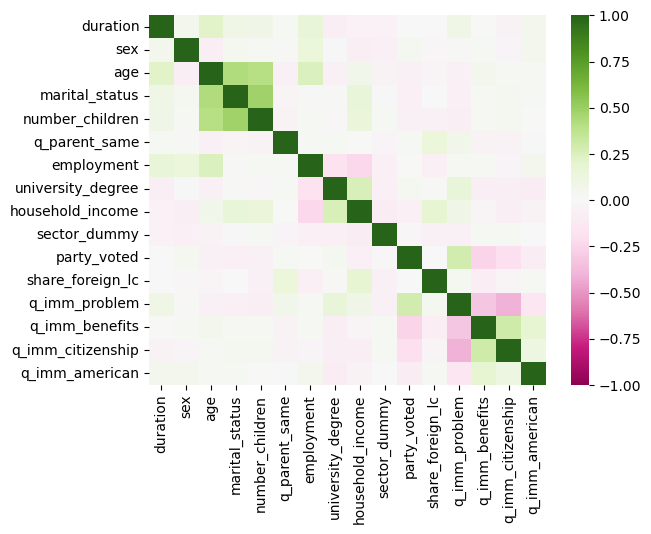

In [104]:
sns.heatmap(corrs, cmap='PiYG', vmin=-1, vmax=1) # Визуализирую корреляционную матрицу

Самые сильная корреляция в данных между семейным статусом и количеством детей. При этом корреляция остаётся низкой.

### Определю целевую переменную и масштабирую признаки

In [105]:
X, y = data.drop(['share_foreign_lc'], axis=1), data.share_foreign_lc

In [106]:
# Нормализую признаки
from sklearn.preprocessing import MinMaxScaler

# Перезапишу в датафрейм, так как MinMaxScaler возвращает np.array, с которым работать неудобно
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns, index=X.index)
X.head()

,duration,sex,age,marital_status,number_children,q_parent_same,employment,university_degree,household_income,sector_dummy,party_voted,country,q_imm_problem,q_imm_benefits,q_imm_citizenship,q_imm_american
0,0.169011,0.0,0.274510,0.00,0.0,0.0,0.500000,0.0,0.272727,0.0,0.833333,0.0,0.50,0.142857,0.50,0.166667
1,0.174732,0.0,0.725490,0.25,0.0,0.0,0.000000,0.0,0.181818,1.0,0.666667,0.0,0.50,0.428571,0.25,0.166667
2,0.247914,0.0,0.058824,0.00,0.0,0.0,0.666667,0.0,0.181818,0.0,0.833333,0.0,1.00,0.000000,0.00,0.500000
3,0.120620,1.0,0.176471,0.00,0.0,0.0,0.000000,1.0,0.272727,0.0,0.666667,0.0,0.50,0.428571,0.25,0.500000
4,0.197139,0.0,0.509804,0.25,0.0,0.0,0.333333,0.0,0.545455,0.0,0.000000,0.0,0.75,0.142857,0.00,0.500000


In [107]:
# Разделю на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Регрессия

Предполагаю, что возможно предсказать долю мигрантов в регионе респондента по его ответам на тест.

Хочу ответить на вопрос, сильно ли влияет на мнение людей количество мигрантов в их регионе.

In [108]:
# Строию и обучаю модель классической регрессии на тренировочных данных
model = sm.OLS(y_train, sm.add_constant(X_train)) 
# добавлю константу в X, так как OLS принимает данные уже с первым признаком из единиц

model = model.fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       share_foreign_lc   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     71.50
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.64e-224
Time:                        12:35:44   Log-Likelihood:                -48227.
No. Observations:               14263   AIC:                         9.649e+04
Df Residuals:                   14246   BIC:                         9.662e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.1477      0.33

- Коэффициент детерминации получился достаточно низкий, чтобы сказать, что модель описывает очень малую часть целевого признака.
- В целом, при уровне значимости 0.05 модель значима

Text(0, 0.5, 'Ошибки')

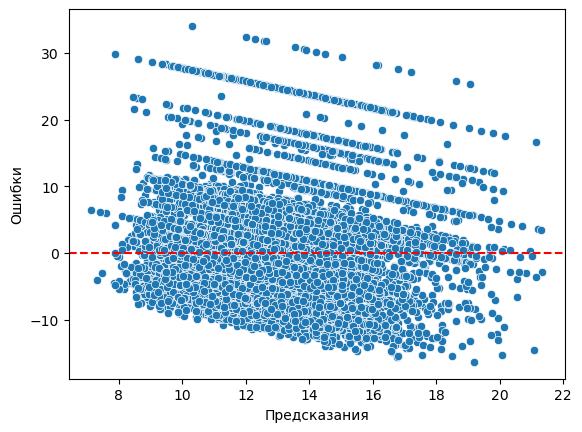

In [109]:
# Визуализирую остатки регрессии
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказания')
plt.ylabel('Ошибки')

Видим, что наблюдения разбросаны вокруг красной линии очень хаотично, что говорит о неверной спецификации модели, так как она очень плохо описывает целевой признак

In [110]:
# Оставлю только значимые признаки 
pvalues = pd.Series(model.pvalues)[1:]
X_train = X_train[pvalues[pvalues < 0.05].index] #Оставляю те признаки, для которых pvalue<0.05
X_test = X_test[pvalues[pvalues < 0.05].index]

In [111]:
# Добавлю квадраты признаков для описания нелинейной зависимости
X_train_2 = pd.concat([X_train, X_train.apply(lambda x: x**2)], axis=1)
X_train_2.columns = ['marital_status', 'number_children', 'q_parent_same', 'employment',
       'university_degree', 'household_income', 'q_imm_benefits',
       'q_imm_american', 'marital_status^2', 'number_children^2', 'q_parent_same^2', 'employment^2',
       'university_degree^2', 'household_income^2', 'q_imm_benefits^2',
       'q_imm_american^2']

X_test_2 = pd.concat([X_test, X_test.apply(lambda x: x**2)], axis=1)
X_test_2.columns = ['marital_status', 'number_children', 'q_parent_same', 'employment',
       'university_degree', 'household_income', 'q_imm_benefits',
       'q_imm_american', 'marital_status^2', 'number_children^2', 'q_parent_same^2', 'employment^2',
       'university_degree^2', 'household_income^2', 'q_imm_benefits^2',
       'q_imm_american^2']

X_train_2.head()

,marital_status,number_children,q_parent_same,employment,university_degree,household_income,q_imm_benefits,q_imm_american,marital_status^2,number_children^2,q_parent_same^2,employment^2,university_degree^2,household_income^2,q_imm_benefits^2,q_imm_american^2
19725,0.00,0.2,0.0,0.000000,0.0,0.272727,0.000000,0.500000,0.0000,0.04,0.0,0.000000,0.0,0.074380,0.000000,0.250000
11430,0.75,0.8,0.0,1.000000,0.0,0.363636,0.142857,0.000000,0.5625,0.64,0.0,1.000000,0.0,0.132231,0.020408,0.000000
14829,0.25,0.0,0.0,0.000000,0.0,0.454545,0.857143,0.500000,0.0625,0.00,0.0,0.000000,0.0,0.206612,0.734694,0.250000
629,0.00,0.0,0.0,0.500000,0.0,0.090909,1.000000,0.833333,0.0000,0.00,0.0,0.250000,0.0,0.008264,1.000000,0.694444
5449,0.25,0.4,0.0,0.333333,0.0,0.363636,1.000000,0.833333,0.0625,0.16,0.0,0.111111,0.0,0.132231,1.000000,0.694444


In [112]:
# Обучу модель линейной регрессии с регуляризацией (штрафом для больших весов)
from sklearn.linear_model import ElasticNetCV

# ElasticNet - модель, объединяющая l1 и l2 регуляризаторы
elastic = ElasticNetCV(
    l1_ratio=np.linspace(0.001, 1, 20), # Подбираю параметры через кросс-валидацию
    alphas=np.linspace(0.001, 100, 20)
)
elastic.fit(X_train_2, y_train)
y_pred = elastic.predict(X_train_2)
error = y_train - y_pred

elastic.l1_ratio_, elastic.alpha_

(0.001, 0.001)

In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_train, y_pred)

0.07968751747952774

Text(0, 0.5, 'Ошибки')

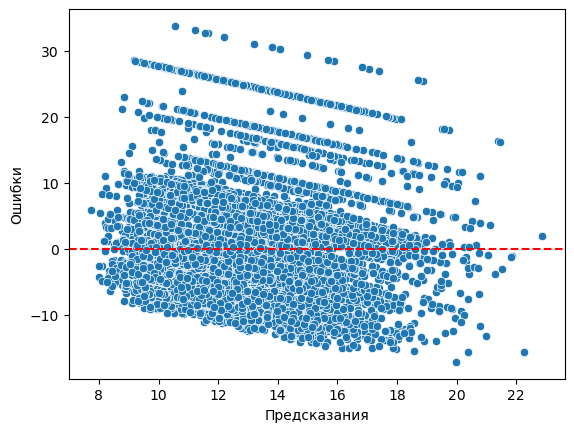

In [114]:
sns.scatterplot(x=y_pred, y=error)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказания')
plt.ylabel('Ошибки')

In [115]:
# Оценю модель на тестовых данных
y_pred = elastic.predict(X_test_2)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.08695043414230075, 5.358163634049511, 49.21791121429897)

Модель улучшилась, но совсем незначительно. Коэффициент регуляризации обучился минимальным, что говорит о том, что регуляризация не повлияла на модель. Улучшение появилось после введения квадратов признаков. 

Причиной низкого качества модели может быть:
- Неверная спецификация модели
- Целевую переменную невозможно предсказать по имеющимся признакам

In [116]:
# Обучу случайный лес

# Подберу лучшие гиперпараметры через кросс-валидацию
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV # Класс для кросс-валидации

# rfr = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid = {
#         'n_estimators': [10, 50, 100],
#         'max_depth': [10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     cv=3
# )
# rfr.fit(X_train, y_train)

# rfr.best_params_

(Закомментировал, так как долго обучается)

Лучшие признаки:
{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [117]:
# Обучу модель без кросс-валидации на лучших гиперпараметрах, которые уже найдены
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(
    **{
        'max_depth': 10, 
        'min_samples_leaf': 4, 
        'min_samples_split': 2, 
        'n_estimators': 50
    },
    random_state=1
)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.08431560784945835, 5.33887996138541, 49.35994145164365)

Text(0, 0.5, 'Ошибки')

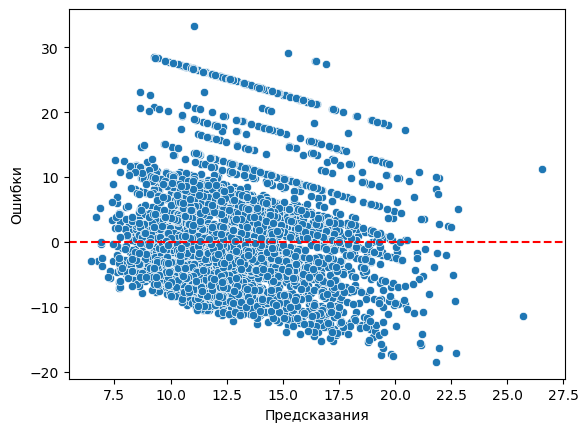

In [118]:
sns.scatterplot(x=y_pred, y=y_test-y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказания')
plt.ylabel('Ошибки')

Модель не стала лучше. 

Вывод:
- Классическими эконометрическими методами и методами машинного обучения не получается предсказать по личным данным и результатам опроса долю иммигрантов в месте, где он проживает.

# Классификация

Целевая переменная для классификации: q_imm_problem

Является ли проблемой численность легальных иммигрантов? (13=совсем не проблема, 14=небольшая проблема, 15=проблема, 16=серьезная проблема, 17=очень серьезная проблема)


Задача: научиться предсказывать, считает ли проблемой численность легальных иммигрантов респондент по результатам опроса 

In [119]:
# Выделю целевую переменную
y, X = data['q_imm_problem'], data.drop('q_imm_problem', axis=1)

Сделаю целевую переменную бинарной (сведу задачу к бинарной классификации): 
- те, кто не считают мигрантов небольшой проблемой или вообще проблемой не считают
- считают мигрантов проблемой

In [120]:
y = pd.Series(np.where(y >= 15, 1, 0))

# Посчитаю сколько наблюдений относятся к типу 1, а сколько к 0
y.value_counts()

1    11897
0     8479
dtype: int64

Людей, считающих мигрантов проблемой больше, чем остальных

In [121]:
# Нормализую данные
X = MinMaxScaler().fit_transform(X)

In [122]:
# Разделю на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [123]:
# Построю модель и оценю её качество
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

# Выведу метрики качества для тренировочной выборки
accuracy_score(y_train, predict_train), f1_score(y_train, predict_train)

(0.7108602678258431, 0.772757328631254)

In [124]:
# Выведу метрики качества для тестовой выборки
accuracy_score(y_test, predict_test), f1_score(y_test, predict_test)

(0.708653688859807, 0.7677663319859173)

Для оценки модели я использовал метрики:
- accuracy_score: Это простое отношение правильно классифицированных примеров ко всем примерам.
- f1_score: Это среднее гармоническое между точностью (precision) и полнотой (recall)

Мы видим, что модель верно предсказывает в 71% случаев на тестовой выборке. Переобучения нет, так как на тренировочных данных модель показала почти такой-же результат  

# Кластеризация

Необходимо разбить наблюдения на 5 кластеров

In [125]:
# Нормализую данные
data_с = pd.DataFrame(
    MinMaxScaler().fit_transform(data),
    columns=data.columns,
    index=data.index
)

data_с.head()

,duration,sex,age,marital_status,number_children,q_parent_same,employment,university_degree,household_income,sector_dummy,party_voted,country,share_foreign_lc,q_imm_problem,q_imm_benefits,q_imm_citizenship,q_imm_american
0,0.169011,0.0,0.274510,0.00,0.0,0.0,0.500000,0.0,0.272727,0.0,0.833333,0.0,0.446273,0.50,0.142857,0.50,0.166667
1,0.174732,0.0,0.725490,0.25,0.0,0.0,0.000000,0.0,0.181818,1.0,0.666667,0.0,0.411541,0.50,0.428571,0.25,0.166667
2,0.247914,0.0,0.058824,0.00,0.0,0.0,0.666667,0.0,0.181818,0.0,0.833333,0.0,0.411541,1.00,0.000000,0.00,0.500000
3,0.120620,1.0,0.176471,0.00,0.0,0.0,0.000000,1.0,0.272727,0.0,0.666667,0.0,0.411541,0.50,0.428571,0.25,0.500000
4,0.197139,0.0,0.509804,0.25,0.0,0.0,0.333333,0.0,0.545455,0.0,0.000000,0.0,0.449838,0.75,0.142857,0.00,0.500000


In [126]:
# Кластеризую
from sklearn.cluster import KMeans

cluster = KMeans(n_init='auto', n_clusters=5, random_state=1)
cluster.fit(data_с)

# Выведу переменную с итоговыми кластерами
clusters = pd.Series(cluster.labels_, name='clusters', index=data.index)

# Объединю с данными
data = pd.concat([data, clusters], axis=1)
data.head()

,duration,sex,age,marital_status,number_children,q_parent_same,employment,university_degree,household_income,sector_dummy,party_voted,country,share_foreign_lc,q_imm_problem,q_imm_benefits,q_imm_citizenship,q_imm_american,clusters
0,13.933333,1,32,1.0,1.0,1.0,4.0,0.0,4.0,0.0,5.0,0,20.079079,15.0,2.0,3.0,2.0,3
1,14.333333,1,55,2.0,1.0,1.0,1.0,0.0,3.0,1.0,4.0,0,18.557440,15.0,4.0,2.0,2.0,0
2,19.450001,1,21,1.0,1.0,1.0,5.0,0.0,3.0,0.0,5.0,0,18.557440,17.0,1.0,1.0,4.0,3
3,10.550000,2,27,1.0,1.0,1.0,1.0,1.0,4.0,0.0,4.0,0,18.557440,15.0,4.0,2.0,4.0,1
4,15.900000,1,44,2.0,1.0,1.0,3.0,0.0,7.0,0.0,0.0,0,20.235270,16.0,2.0,1.0,4.0,3


<Axes: xlabel='clusters', ylabel='count'>

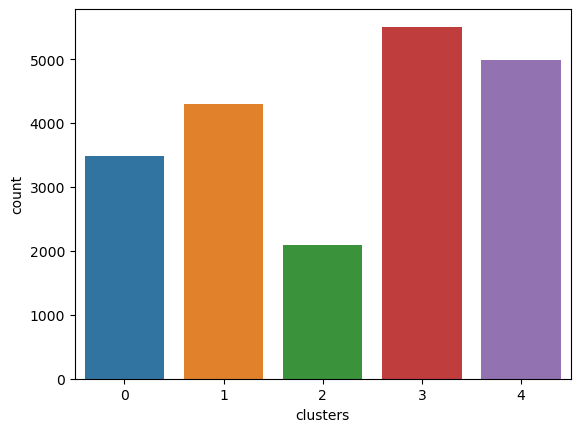

In [127]:
# Выведу количество наблюдений, попавшее в разные кластеры
sns.countplot(data=data, x='clusters')

Мы видим, что наблюдений в кластере 2 меньше всего, когда как в кластере 3 - больше всего